<a href="https://colab.research.google.com/github/vinpala/ILoveNumbers/blob/master/MNIST_classification_Inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Saving MNIST images in separate folders as JPEG

Retraining using https://github.com/tensorflow/hub/blob/master/examples/image_retraining/retrain.py assumes you have a folder containing class-named
subfolders, each full of images for each label

In [0]:
import os
import scipy.misc
from tensorflow.contrib.learn.python.learn.datasets.mnist import extract_images, extract_labels
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

our files are available on this site: http://yann.lecun.com/exdb/mnist/

      train-images-idx3-ubyte.gz:  training set images (9912422 bytes) 
      train-labels-idx1-ubyte.gz:  training set labels (28881 bytes) 
      t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes) 
      t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes)

In [0]:
!ls

mnist  MNIST_data  sample_data


In [0]:
!ls MNIST_data

t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [0]:
train_images_path = "MNIST_data/train-images-idx3-ubyte.gz"
train_labels_path = "MNIST_data/train-labels-idx1-ubyte.gz"

test_images_path = "MNIST_data/t10k-images-idx3-ubyte.gz"
test_labels_path = "MNIST_data/t10k-labels-idx1-ubyte.gz"

In [0]:
# load training images binary file
with open(train_images_path, 'rb') as f:
  train_images = extract_images(f)
# load training labels binary file
with open(train_labels_path, 'rb') as f:
  train_labels = extract_labels(f)


# load test images binary file
with open(test_images_path, 'rb') as f:
  test_images = extract_images(f)
# load test labels binary file
with open(test_labels_path, 'rb') as f:
  test_labels = extract_labels(f)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [0]:
train_images[0].shape

(28, 28, 1)

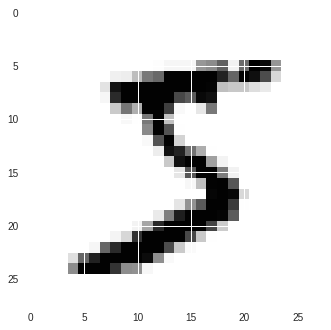

In [0]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0].reshape(28,28))

In [0]:
train_images.shape

(60000, 28, 28, 1)

In [0]:
#!rm -r mnist

In [0]:
import collections
collections.Counter(list(train_labels))

Counter({0: 5923,
         1: 6742,
         2: 5958,
         3: 6131,
         4: 5842,
         5: 5421,
         6: 5918,
         7: 6265,
         8: 5851,
         9: 5949})

In [0]:
if not os.path.isdir("mnist/train-images"):
   os.makedirs("mnist/train-images")
if not os.path.isdir("mnist/test-images"):
   os.makedirs("mnist/test-images")

In [0]:
for i in set(train_labels):
    train_path = "mnist/train-images/" + str(i)
    if not os.path.exists(train_path):
        os.makedirs(train_path)
for i in set(test_labels):
    test_path ="mnist/test-images/" + str(i) 
    if not os.path.exists(test_path):
        os.makedirs(test_path)

In [0]:
!ls mnist/train-images

0  1  2  3  4  5  6  7	8  9


In [0]:
from scipy.misc import imsave
import numpy as np
from PIL import Image
def saveas_jpeg(path, images, labels):
  for i in range(len(images)):
    img = images[i][:]

    #reshape into 28x28 pic
    img = img.reshape(28,28)

    #we need three channels into the picture
    img = np.stack((img,)*3,axis = -1)

    #change the data type to int8
    img = np.uint8(img)

    #create PIL Image
    new_img = Image.fromarray(img)
     
    #save the .jpg into correct folder
    new_img.save(path + str(labels[i]) + '/' + str(i) + '.jpg', 'JPEG')

In [0]:
saveas_jpeg("mnist/test-images/", test_images, test_labels)

In [0]:
!ls mnist/test-images/

0  1  2  3  4  5  6  7	8  9


In [0]:
!ls mnist/test-images/9

1000.jpg  2161.jpg  3387.jpg  4319.jpg	530.jpg   6507.jpg  7640.jpg  8846.jpg
1005.jpg  2181.jpg  3392.jpg  4321.jpg	5311.jpg  6508.jpg  7641.jpg  8882.jpg
1013.jpg  2189.jpg  3394.jpg  4325.jpg	5315.jpg  6512.jpg  7651.jpg  8893.jpg
1045.jpg  2196.jpg  3404.jpg  4333.jpg	5333.jpg  6520.jpg  7652.jpg  8897.jpg
1048.jpg  2212.jpg  3411.jpg  4344.jpg	5344.jpg  6524.jpg  7680.jpg  8899.jpg
104.jpg   2216.jpg  3426.jpg  434.jpg	5352.jpg  6560.jpg  7682.jpg  8900.jpg
1058.jpg  2227.jpg  3459.jpg  4358.jpg	5373.jpg  6565.jpg  7697.jpg  8906.jpg
105.jpg   2232.jpg  3460.jpg  4363.jpg	5375.jpg  6568.jpg  7700.jpg  8920.jpg
1063.jpg  2244.jpg  3467.jpg  4369.jpg	5377.jpg  6571.jpg  7707.jpg  8928.jpg
1081.jpg  2250.jpg  3472.jpg  4383.jpg	5386.jpg  6592.jpg  7736.jpg  8933.jpg
1086.jpg  2257.jpg  3477.jpg  4405.jpg	5388.jpg  6608.jpg  773.jpg   8935.jpg
1088.jpg  2259.jpg  3478.jpg  4407.jpg	5404.jpg  6610.jpg  7746.jpg  893.jpg
108.jpg   2263.jpg  3483.jpg  4408.jpg	5414.jpg  6627.jpg  7756.jp

In [0]:
!ls mnist/test-images/0/5818.jpg

ls: cannot access 'mnist/test-images/0/5818.jpg': No such file or directory


In [0]:
!feh mnist/test-images/0/5818.jpg

/bin/bash: feh: command not found


In [0]:
path="mnist/test-images/0/5818.jpg"
display(Image.open(path))

In [0]:
path="mnist/test-images/9/5837.jpg"
display(Image.open(path))

In [0]:
img = Image.open(path)

In [0]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [0]:
np.array(img).shape

(28, 28, 3)

In [0]:
saveas_jpeg("mnist/train-images/", train_images, train_labels)

In [0]:
!ls mnist/train-images/8

10001.jpg  17760.jpg  25731.jpg  33481.jpg  41106.jpg  48668.jpg  56235.jpg
10012.jpg  17765.jpg  25736.jpg  33490.jpg  41115.jpg  48684.jpg  56250.jpg
10021.jpg  17768.jpg  25741.jpg  33514.jpg  41118.jpg  48688.jpg  56254.jpg
10041.jpg  1776.jpg   25763.jpg  33517.jpg  41124.jpg  48693.jpg  56255.jpg
10054.jpg  1777.jpg   25766.jpg  33519.jpg  41130.jpg  48704.jpg  5625.jpg
10057.jpg  17784.jpg  25776.jpg  33533.jpg  41132.jpg  48711.jpg  56284.jpg
10061.jpg  17803.jpg  2577.jpg	 33539.jpg  41133.jpg  48723.jpg  56286.jpg
10064.jpg  17804.jpg  25796.jpg  3353.jpg   41153.jpg  48726.jpg  5628.jpg
10066.jpg  17808.jpg  25799.jpg  33546.jpg  41154.jpg  48734.jpg  56290.jpg
10079.jpg  1780.jpg   25819.jpg  3354.jpg   41175.jpg  48737.jpg  56295.jpg
1009.jpg   17818.jpg  25835.jpg  33557.jpg  41180.jpg  48739.jpg  56296.jpg
10115.jpg  17825.jpg  25843.jpg  33569.jpg  41183.jpg  4873.jpg   56299.jpg
10124.jpg  1783.jpg   25849.jpg  33570.jpg  41200.jpg  48743.jpg  56307.jpg
10126.jpg  1785

In [0]:
path="mnist/train-images/8/26136.jpg"
display(Image.open(path))

In [0]:
from keras.preprocessing import image
temp_img=image.load_img("mnist/train-images/8/26136.jpg",target_size=(224,224)) #interpolation used : default - nearest

Using TensorFlow backend.


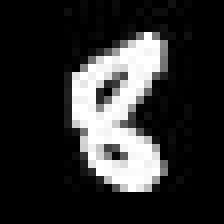

In [0]:
display(temp_img)

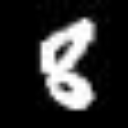

In [0]:
temp_img=image.load_img("mnist/train-images/8/26136.jpg",target_size=(128,128), interpolation="bilinear") #interpolation bilinear
display(temp_img)

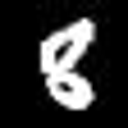

In [0]:
temp_img=image.load_img("mnist/train-images/8/26136.jpg",target_size=(128,128), interpolation="bicubic") 
display(temp_img)

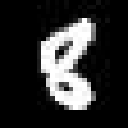

In [0]:
temp_img=image.load_img("mnist/train-images/8/26136.jpg",target_size=(128,128), interpolation="nearest") 
display(temp_img)

### Resizing them to suit the input size of pretrained models

In [0]:
from keras.preprocessing import image
import os
path = "mnist/train-images/"
classes = list(set(train_labels))
for i in range(len(classes)):
  path = "mnist/train-images/" +str(classes[i])+'/'
  files = os.listdir(path)
  for file in files:
    img=image.load_img(path+file,target_size=(128,128), interpolation="bilinear")
    img.save(path+file)

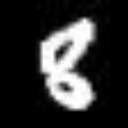

In [0]:
|path="mnist/train-images/8/26136.jpg"
display(Image.open(path))

In [0]:
len(os.listdir("mnist/train-images/8"))

5851

In [0]:
from keras.preprocessing import image
path = "mnist/test-images/"
classes = list(set(test_labels))
for i in range(len(classes)):
  path = "mnist/test-images/" +str(classes[i])+'/'
  files = os.listdir(path)
  for file in files:
    img=image.load_img(path+file,target_size=(128,128), interpolation="bilinear")
    img.save(path+file)

Using TensorFlow backend.


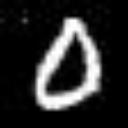

In [0]:
path="mnist/test-images/0/5818.jpg"
display(Image.open(path))

# Configure Tensorboard

https://www.dlology.com/blog/quick-guide-to-run-tensorboard-in-google-colab/

But there is one thing we need to address first. Your Google Colab virtual machine is running on a local network located in a Google's server room, while your local machine could be anywhere else in the world.

How to access the TensorBoard page from our local machine?

We are going to use a free service named ngrok to tunnel the connection to your local machine.

In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2018-12-27 22:43:47--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.165.51.142, 54.174.228.92, 52.73.94.166, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.165.51.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5363700 (5.1M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]   5.11M  9.80MB/s    in 0.5s    

2018-12-27 22:43:48 (9.80 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [5363700/5363700]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


 let's fire up the TensorBoard in the background like this:

In [0]:
LOG_DIR = './mnist/training_summaries'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

Then, we can run ngrok to tunnel TensorBoard port 6006 to the outside world. This command also runs in the background.


In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [0]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://68f6e01f.ngrok.io


# Configure your Inception net

In [0]:
#!pip install --upgrade "tensorflow==1.7.*"

Requirement already up-to-date: tensorflow==1.7.* in /usr/local/lib/python3.6/dist-packages (1.7.1)


In [0]:
!git clone https://github.com/googlecodelabs/tensorflow-for-poets-2

Cloning into 'tensorflow-for-poets-2'...
remote: Enumerating objects: 405, done.
remote: Total 405 (delta 0), reused 0 (delta 0), pack-reused 405
Receiving objects: 100% (405/405), 33.96 MiB | 37.39 MiB/s, done.
Resolving deltas: 100% (149/149), done.


In [0]:
!cd tensorflow-for-poets-2

In [0]:
!ls tensorflow-for-poets-2

android  CONTRIBUTING.md  ios  LICENSE	README.md  scripts  tf_files


In [0]:
#IMAGE_SIZE = 128
#ARCHITECTURE = f"mobilenet_0.50_${IMAGE_SIZE}"

In [0]:
%%timeit
!python -m tensorflow-for-poets-2.scripts.retrain \
  --bottleneck_dir=mnist/bottlenecks \
  --model_dir=mnist/models/"inception_v3" \
  --summaries_dir=mnist/training_summaries/"inception_v3" \
  --output_graph=mnist/retrained_graph_inc.pb \
  --output_labels=mnist/retrained_labels_inc.txt \
  --image_dir=mnist/train-images

>> Downloading inception-2015-12-05.tgz 100.0%
--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/content/tensorflow-for-poets-2/scripts/retrain.py", line 1326, in <module>
    tf.app.run(main=main, argv=[sys.argv[0]] + unparsed)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/platform/app.py", line 1

In [0]:
%%timeit
!python -m tensorflow-for-poets-2.scripts.retrain \
  --bottleneck_dir=mnist/bottlenecks \
  --model_dir=mnist/models/"mobilenet_0.50_128" \
  --summaries_dir=mnist/training_summaries/"mobilenet_0.50_128" \
  --output_graph=mnist/retrained_graph.pb \
  --output_labels=mnist/retrained_labels.txt \
  --architecture="mobilenet_0.50_128" \
  --image_dir=mnist/train-images

>> Downloading mobilenet_v1_0.50_128_frozen.tgz 100.0%
--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/content/tensorflow-for-poets-2/scripts/retrain.py", line 1326, in <module>
    tf.app.run(main=main, argv=[sys.argv[0]] + unparsed)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/platform/app.py"

In [0]:
#https://medium.com/google-cloud/optimizing-tensorflow-models-for-serving-959080e9ddbf
def get_size(model_dir, model_file='saved_model.pb'):

  model_file_path = os.path.join(model_dir, model_file)

  print(model_file_path, '')

  pb_size = os.path.getsize(model_file_path)

  variables_size = 0

  if os.path.exists(

      os.path.join(model_dir,'variables/variables.data-00000-of-00001')):

    variables_size = os.path.getsize(os.path.join(

        model_dir,'variables/variables.data-00000-of-00001'))

    variables_size += os.path.getsize(os.path.join(

        model_dir,'variables/variables.index'))

  print('Model size: {} KB'.format(round(pb_size/(1024.0),3)))

  print('Variables size: {} KB'.format(round( variables_size/(1024.0),3)))

  print('Total Size: {} KB'.format(round((pb_size + variables_size)/(1024.0),3)))

In [0]:
get_size('mnist', 'retrained_graph.pb' )

mnist/retrained_graph.pb 
Model size: 5379.671 KB
Variables size: 0.0 KB
Total Size: 5379.671 KB


In [0]:
from google.colab import files

files.download('mnist/retrained_graph.pb')

In [0]:
files.download('mnist/retrained_labels.txt')

# Inference

In [0]:
!python -m tensorflow-for-poets-2.scripts.label_image \
  --graph=retrained_graph.pb  \
  --labels=retrained_labels.txt \
  --image=mnist/test-images/0/10.jpg \
  --input_width=128\
  --input_height=128

2018-12-27 10:19:33.947643: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA

Evaluation time (1-image): 0.093s

0 (score=0.99740)
5 (score=0.00233)
6 (score=0.00011)
4 (score=0.00006)
8 (score=0.00004)


In [0]:
!python -m tensorflow-for-poets-2.scripts.label_image \
  --graph=retrained_graph.pb  \
  --labels=retrained_labels.txt \
  --image=mnist/test-images/1/1037.jpg \
  --input_width=128\
  --input_height=128


2018-12-27 10:20:21.265088: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA

Evaluation time (1-image): 0.096s

1 (score=0.99889)
4 (score=0.00090)
6 (score=0.00010)
7 (score=0.00006)
0 (score=0.00003)


In [0]:
!python -m tensorflow-for-poets-2.scripts.label_image \
  --graph=retrained_graph.pb  \
  --labels=retrained_labels.txt \
  --image=mnist/test-images/2/5636.jpg \
  --input_width=128\
  --input_height=128


2018-12-27 10:21:11.449014: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA

Evaluation time (1-image): 0.098s

2 (score=0.99899)
5 (score=0.00079)
4 (score=0.00013)
3 (score=0.00006)
6 (score=0.00001)


# Convert to TFLite format

https://codelabs.developers.google.com/codelabs/tensorflow-for-poets-2-tflite/#2

Mobile devices have significant limitations, so any pre-processing that can be done to reduce an app's footprint is worth considering. With TFLite a new graph converter is now included with the TensorFlow installation. This program is called the "TensorFlow Lite Optimizing Converter" or tflite_convert. While tflite_convert has advanced capabilities for dealing with quantized graphs, it also applies several optimizations that are still useful for our graph, (which does not use quantization). These include pruning unused graph-nodes, and performance improvements by joining operations into more efficient composite operations.

The pruning is especially helpful given that TFLite does not support training operations yet, so these should not be included in the graph.

While tflite_convert can be used to optimize regular graph.pb files, TFLite uses a different serialization format from regular TensorFlow. TensorFlow uses Protocol Buffers, while TFLite uses FlatBuffers.

The primary benefit of FlatBuffers comes from the fact that they can be memory-mapped, and used directly from disk without being loaded and parsed. This gives much faster startup times, and gives the operating system the option of loading and unloading the required pages from the model file, instead of killing the app when it is low on memory.

In [0]:
!tflite_convert --help

usage: tflite_convert [-h] --output_file OUTPUT_FILE
                      (--graph_def_file GRAPH_DEF_FILE | --saved_model_dir SAVED_MODEL_DIR | --keras_model_file KERAS_MODEL_FILE)
                      [--output_format {TFLITE,GRAPHVIZ_DOT}]
                      [--inference_type {FLOAT,QUANTIZED_UINT8}]
                      [--inference_input_type {FLOAT,QUANTIZED_UINT8}]
                      [--input_arrays INPUT_ARRAYS]
                      [--input_shapes INPUT_SHAPES]
                      [--output_arrays OUTPUT_ARRAYS]
                      [--saved_model_tag_set SAVED_MODEL_TAG_SET]
                      [--saved_model_signature_key SAVED_MODEL_SIGNATURE_KEY]
                      [--std_dev_values STD_DEV_VALUES]
                      [--mean_values MEAN_VALUES]
                      [--default_ranges_min DEFAULT_RANGES_MIN]
                      [--default_ranges_max DEFAULT_RANGES_MAX]
                      [--post_training_quantize] [--drop_control_dependency]
      

In [0]:
!tflite_convert \
  --graph_def_file=retrained_graph.pb \
  --output_file=optimized_graph_mobilenet.lite \
  --input_format=TENSORFLOW_GRAPHDEF \
  --output_format=TFLITE \
  --input_shape=1,128,128,3 \
  --input_array=input \
  --output_array=final_result \
  --inference_type=FLOAT \
  --input_data_type=FLOAT

2018-12-27 11:01:09.384085: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:964] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2018-12-27 11:01:09.384572: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1432] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
2018-12-27 11:01:09.384616: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1511] Adding visible gpu devices: 0
2018-12-27 11:01:10.336434: I tensorflow/core/common_runtime/gpu/gpu_device.cc:982] Device interconnect StreamExecutor with strength 1 edge matrix:
2018-12-27 11:01:10.336497: I tensorflow/core/common_runtime/gpu/gpu_device.cc:988]      0 
2018-12-27 11:01:10.336526: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1001] 0:   N 
2018-12-27 11:01:10.336848: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc

In [0]:
import tensorflow as tf
tf.__version__

'1.12.0'